# Multi-Class Resume Classification using ML Model

#### In this notebook we will train a ML model to categorize resume 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier



/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df = pd.read_csv('UpdatedResumeDataSet.txt')
df.head()

Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

In [3]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [4]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Operations Manager           40
Blockchain                   40
Data Science                 40
Sales                        40
ETL Developer                40
Mechanical Engineer          40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

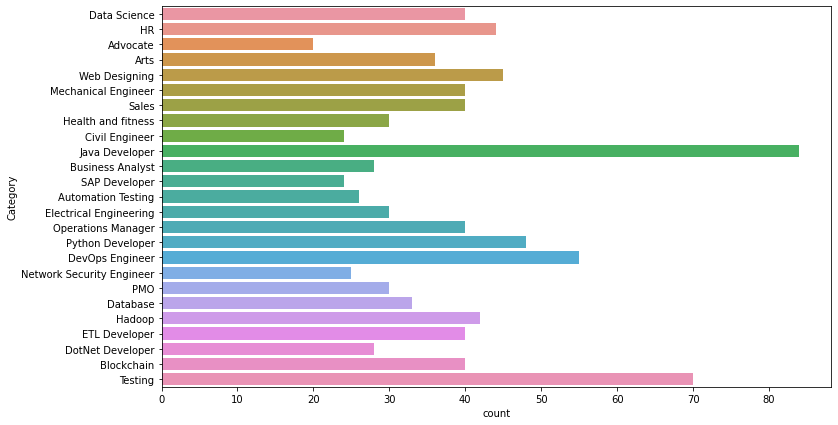

In [5]:
plt.figure(figsize=(12,7))
sns.countplot(y=df['Category'])
plt.show()

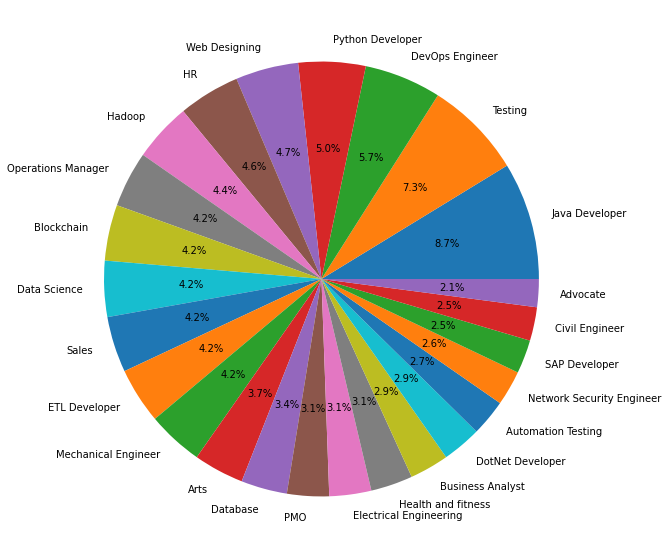

In [6]:
vals = df['Category'].value_counts().values
labels = df["Category"].value_counts().keys()

plt.figure(figsize=(12,10))
plt.pie(vals, labels=labels, autopct='%1.1f%%')
plt.show()

In [7]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [8]:
url = "https://cdgvd.com jklo mnlk"

In [9]:
re.sub('http\S+\s*', '', url)

'jklo mnlk'

In [10]:
def cleanText(text):
    text = re.sub('http\S+\s*', ' ', text)           # Removing URL'S   # \s* is for blank space zero or more
    text = re.sub('#\S+', '', text)                 # Removing # tags  # \S+ is for non-blank space one or more
    text = re.sub('@\S+', '', text)                 # Removing mentions
    text = re.sub('RT|cc', ' ', text)               # remove RT and cc
    text = re.sub('[%s]' % re.escape("""<>/{}[]()%$!"#'*+=@\~`^_-?|:;,.&"""), ' ', text)    # Removing punctuation
    text = re.sub(r'[^\x00-\x7f]', r' ', text)          # Removing non ASCII letters
    text = re.sub('\s+', ' ', text)                 # Replacing extra blank spaces with one space
    
    return text

In [11]:
df['CleanResume'] = df['Resume'].apply(lambda x: cleanText(x))

In [12]:
df.head()

Category                                             Resume  \
0  Data Science  Skills * Programming Languages: Python (pandas...   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Data Science  Areas of Interest Deep Learning, Control Syste...   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   

                                         CleanResume  
0  Skills Programming Languages Python pandas num...  
1  Education Details May 2013 to May 2017 B E UIT...  
2  Areas of Interest Deep Learning Control System...  
3  Skills R Python SAP HANA Tableau SAP HANA SQL ...  
4  Education Details MCA YMCAUST Faridabad Haryan...

In [13]:
df.shape

(962, 3)

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [15]:
le.classes_

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

In [16]:
df['Category']

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(sublinear_tf = True, stop_words='english', max_features=2000)
word_vectors = tf.fit_transform(df['CleanResume'])

In [18]:
word_vectors

<962x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 123286 stored elements in Compressed Sparse Row format>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(word_vectors, df['Category'], test_size=0.2, random_state=7)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(769, 2000)
(193, 2000)
(769,)
(193,)


In [21]:
model = OneVsRestClassifier(KNeighborsClassifier())

In [22]:
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [23]:
model.score(X_train, y_train)

0.9908972691807543

In [24]:
model.score(X_test, y_test)

0.9844559585492227

In [25]:
y_pred = model.predict(X_test)

In [26]:
y_test.shape, y_pred.shape

((193,), (193,))

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         5
           8       1.00      0.90      0.95        10
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         7
          12       1.00      0.78      0.88         9
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         4
          17       1.00    

In [28]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

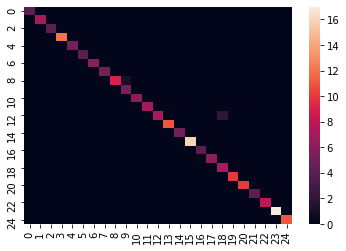

In [29]:
sns.heatmap(cm)